**Data Science in Marketing : Customer Segmentation with Python**

**START**

**Landasan Masalah**

*Perusahaan kamu sedang berusaha untuk mengenal lebih baik pelanggannya. **Tujuannya agar perusahaan kamu dapat membuat strategi pemasaran yang lebih tepat dan juga efisien bagi tiap tiap pelanggan**. Kamu di diberikan tugas agar dapat memberikan rekomendasi untuk menyelesaikan permasalahan tersebut.*

*Kamu teringat bahwa beberapa bulan sebelumnya kamu pernah belajar menghadapi permasalahan serupa di tempat kamu belajar. **Salah satu teknik yang bisa dilakukan untuk mengenal lebih baik pelanggan kamu adalah dengan melakukan segmentasi pelanggan**. Yaitu dengan mengelompokkan pelanggan-pelanggan yang ada berdasarkan kesamaan karakter dari pelanggan tersebut. Untuk melakukan hal tersebut kamu akan menggunakan teknik unsupervised machine learning.*

*Salah satunya teknik yang dapat digunakan adalah pengaplikasian machine learning menggunakan algoritma K-Prototypes. **Algoritma K-Prototypes merupakan gabungan dari K-Means dan juga K-Modes yang dapat digunakan untuk melakukan segmentasi dengan data.***

**Apa itu K-Prototypes?**

*Algoritma K-Prototypes merupakan gabungan dari K-Means dan juga K-Modes. K-Means digunakan untuk clustering pada data numerik, sedangkan K-Modes digunakan untuk clustering pada data kategorikal. Dataset yang akan digunakan pada project ini memiliki 2 tipe data: numerik dan kategorikal. Sehingga, kita akan menggunakan algoritma K-Prototypes.*

**Tujuan Project:**
1. Memahami konsep segmentasi pelanggan dan manfaatnya
2. Melakukan segmentasi pelanggan di Python menggunakan algoritma K-Prototypes
3. Mencari jumlah segmen yang optimal

**TAHAP 1 - PREPARATION DATA**

**Mempersiapkan Library dan Data**

*Kamu sangat bersemangat untuk segera menyelesaikan masalah tersebut. Kamu mulai dari mencari tau data apa yang tersedia dan mengumpulkan data yang dibutuhkan terkait pelanggan.*
1. *Kamu berkoordinasi dengan **tim data engineer** untuk mendapatkan data yang di butuhkan.*
2. *Kamu berdiskusi dengan **tim bisnis** untuk memahami arti dari data-data yang kamu miliki.*

**A. Library yang Digunakan**

*Masalah ini akan dapat di selesaikan dengan menggunakan bantuan library - library di bawah ini:*

- ***Pandas** digunakan untuk melakukan pemrosesan analisis data*
- ***Matplotlib** digunakan sebagai dasar untuk melakukan visualisasi data*
- ***Seaborn** digunakan di atas matplotlib untuk melakukan data visualisasi yang lebih menarik*
- ***Scikit - Learn** digunakan untuk mempersiapkan data sebelum dilakukan permodelan*
- ***kmodes** digunakan untuk melakukan permodelan menggunakan algoritma K-Modes dan K-Prototypes.*
- ***Pickle** digunakan untuk melakukan penyimpanan dari model yang akan di buat.*

In [8]:
# Import Library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

from kmodes.kmodes import KModes
from kmodes.kprototypes import KPrototypes

import pickle
from pathlib import Path

**B. Memahami Data yang Digunakan**

*Langkah pertama yang perlu di lakukan adalah membaca data tersebut yang semula adalah textfile menjadi pandas dataframe.*

In [10]:
import pandas as pd

#import dataset
df = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/customer_segments.txt', sep='\t')
df.head()

,Customer_ID,Nama Pelanggan,Jenis Kelamin,Umur,Profesi,Tipe Residen,NilaiBelanjaSetahun
0,CUST-001,Budi Anggara,Pria,58,Wiraswasta,Sector,9497927
1,CUST-002,Shirley Ratuwati,Wanita,14,Pelajar,Cluster,2722700
2,CUST-003,Agus Cahyono,Pria,48,Professional,Cluster,5286429
3,CUST-004,Antonius Winarta,Pria,53,Professional,Cluster,5204498
4,CUST-005,"Ibu Sri Wahyuni, IR",Wanita,41,Wiraswasta,Cluster,10615206


*Data tersebut memiliki tujuh kolom dengan penjelasan sebagai berikut:*

- ***Customer ID**: Kode pelanggan dengan format campuran teks CUST- diikuti angka*
- ***Nama Pelanggan**: Nama dari pelanggan dengan format teks tentunya*
- ***Jenis Kelamin**: Jenis kelamin dari pelanggan, hanya terdapat dua isi data kategori yaitu Pria dan Wanita*
- ***Umur**: Umur dari pelanggan dalam format angka*
- ***Profesi**: Profesi dari pelanggan, juga bertipe teks kategori yang terdiri dari Wiraswasta, Pelajar, Professional, Ibu Rumah Tangga, dan Mahasiswa.*
- ***Tipe Residen**: Tipe tempat tinggal dari pelanggan kita, untuk dataset ini hanya ada dua kategori: Cluster dan Sector.*
- ***Nilai Belanja Setahun**: Merupakan total belanja yang sudah dikeluarkan oleh pelanggan tersebut.*

**C. Melihat Informasi dari Data**

*Selanjutnya kamu perlu melihat informasi dari data yang ada. Sehingga dengan kamu bisa mengetahui jumlah baris dan kolom, nama kolom, identifikasi null values,  dan juga mengetahui tipe data dengan mudah.*

In [12]:
import pandas as pd
df = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/customer_segments.txt', sep='\t')

# Menampilkan informasi data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Customer_ID          50 non-null     object
 1   Nama Pelanggan       50 non-null     object
 2   Jenis Kelamin        50 non-null     object
 3   Umur                 50 non-null     int64 
 4   Profesi              50 non-null     object
 5   Tipe Residen         50 non-null     object
 6   NilaiBelanjaSetahun  50 non-null     int64 
dtypes: int64(2), object(5)
memory usage: 2.9+ KB


**D. Kesimpulan**

*Setelah melakukan pemanggilan data dan melihat informasi data yang kamu miliki, kamu akhirnya mengetahui bahwa:*

1. *Data yang akan digunakan terdiri dari 50 baris dan 7 kolom*
2. *Tidak ada nilai null pada data*
3. *Dua kolom memiliki tipe data numeric dan lima data bertipe string*

**E. Tips:**

*Dalam setiap project machine learning, kita harus memahami informasi dasar dari data yang kita miliki sebelum melakukan analisa lebih lanjut. Dengan melakukan hal ini, kita bisa memastikan tipe data dari masing-masing kolom sudah benar, mengetahui apakah ada data null di tiap tiap kolom, dan juga mengetahui nama-nama kolom di dataset yang kita gunakan. Informasi ini nantinya akan menentukan proses apa yang perlu kita lakukan selanjutnya.*

**Melakukan Eksplorasi Data**

*Pada tahap sebelumnya kamu sudah menyiapkan data dan melihat informasi dasar dari data yang kamu miliki.*

*Selanjutnya kamu perlu melakukan eksplorasi data untuk lebih mengenal dataset yang akan digunakan. Kamu akan melakukan eksplorasi untuk data numerik dan juga data kategorikal.*

**A. Eksplorasi Data Numerik**

***Pertama kamu perlu melihat distribusi data dari data yang berjenis numerik.** Disini kamu akan menggunakan boxplot dan juga histogram untuk melihat distribusi datanya. Untuk membuat grafik tersebut, kamu perlu menyiapkan kolom mana yang merupakan kolom numerik. Kemudian menggunakan library seaborn untuk membuat plot masing-masing kolom numerik, yaitu 'Umur' dan 'NilaiBelanjaSetahun'.*

  adjustable: {'box', 'datalim'}
  agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n, 3) array and two offsets from the bottom left corner of the image
  alpha: scalar or None
  anchor: (float, float) or {'C', 'SW', 'S', 'SE', 'E', 'NE', ...}
  animated: bool
  aspect: {'auto', 'equal'} or float
  autoscale_on: bool
  autoscalex_on: bool
  autoscaley_on: bool
  axes_locator: Callable[[Axes, Renderer], Bbox]
  axisbelow: bool or 'line'
  box_aspect: float or None
  clip_box: `.Bbox`
  clip_on: bool
  clip_path: Patch or (Path, Transform) or None
  facecolor or fc: color
  figure: `.Figure`
  frame_on: bool
  gid: str
  in_layout: bool
  label: object
  navigate: bool
  navigate_mode: unknown
  path_effects: `.AbstractPathEffect`
  picker: None or bool or float or callable
  position: [left, bottom, width, height] or `~matplotlib.transforms.Bbox`
  prop_cycle: unknown
  rasterization_zorder: float or None
  rasterized: bool
  sketch_p

C:\Users\sendy\AppData\Local\Temp\ipykernel_58880\1367433093.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[kol], ax = axs[i][1])
C:\Users\sendy\AppData\Local\Temp\ipykernel_58880\1367433093.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[kol], ax = axs[i][1])


<Figure size 432x288 with 0 Axes>

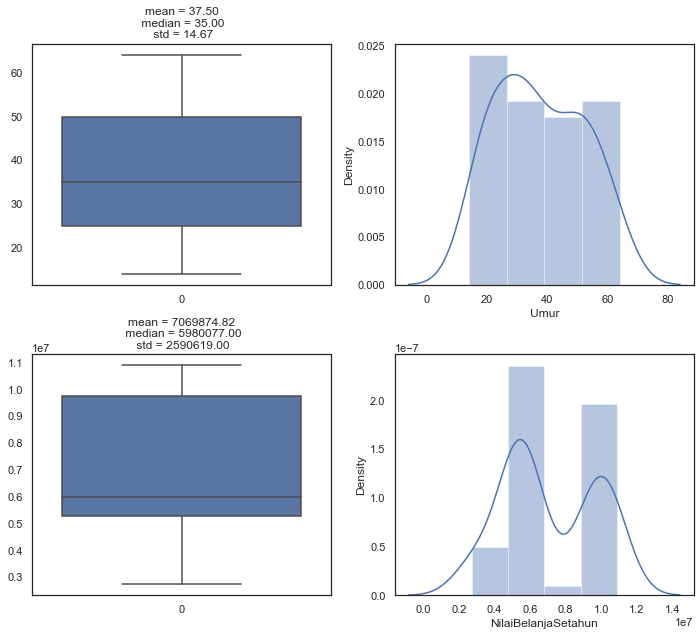

In [83]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='white')
import pandas as pd
df = pd.read_csv("https://storage.googleapis.com/dqlab-dataset/customer_segments.txt", sep="\t")
plt.clf()
  
# Fungsi untuk membuat plot  
def observasi_num(features):  
    fig, axs = plt.subplots(2, 2, figsize=(10, 9))
    for i, kol in enumerate(features):
	    sns.boxplot(df[kol], ax = axs[i][0])
	    sns.distplot(df[kol], ax = axs[i][1])   
	    axs[i][0].set_title('mean = %.2f\n median = %.2f\n std = %.2f'%(df[kol].mean(), df[kol].median(), df[kol].std()))
    plt.setp(axs)
    plt.tight_layout()
    plt.show()  
  
# Memanggil fungsi untuk membuat Plot untuk data numerik  
kolom_numerik = ['Umur','NilaiBelanjaSetahun'] 
observasi_num(kolom_numerik) 

**B. Eksplorasi Data Kategorikal**

***Melihat bagaimana persebaran data pada kolom-kolom yang memiliki jenis kategorikal** yaitu Jenis Kelamin, Profesi dan Tipe Residen. Kamu dapat melakukan hal ini dengan menggunakan countplot dari library seaborn.*

  adjustable: {'box', 'datalim'}
  agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n, 3) array and two offsets from the bottom left corner of the image
  alpha: scalar or None
  anchor: (float, float) or {'C', 'SW', 'S', 'SE', 'E', 'NE', ...}
  animated: bool
  aspect: {'auto', 'equal'} or float
  autoscale_on: bool
  autoscalex_on: bool
  autoscaley_on: bool
  axes_locator: Callable[[Axes, Renderer], Bbox]
  axisbelow: bool or 'line'
  box_aspect: float or None
  clip_box: `.Bbox`
  clip_on: bool
  clip_path: Patch or (Path, Transform) or None
  facecolor or fc: color
  figure: `.Figure`
  frame_on: bool
  gid: str
  in_layout: bool
  label: object
  navigate: bool
  navigate_mode: unknown
  path_effects: `.AbstractPathEffect`
  picker: None or bool or float or callable
  position: [left, bottom, width, height] or `~matplotlib.transforms.Bbox`
  prop_cycle: unknown
  rasterization_zorder: float or None
  rasterized: bool
  sketch_p

<Figure size 432x288 with 0 Axes>

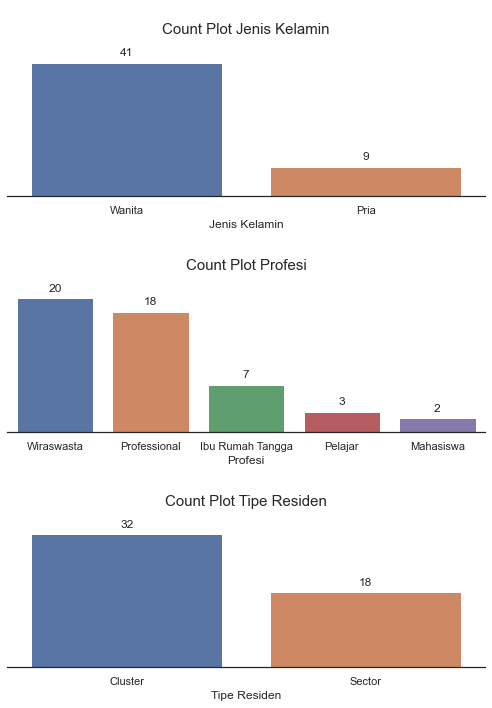

In [84]:
plt.clf()
  
# Menyiapkan kolom kategorikal  
kolom_kategorikal = ['Jenis Kelamin','Profesi','Tipe Residen']  

# Membuat canvas
fig, axs = plt.subplots(3,1,figsize=(7,10)) 

# Membuat plot untuk setiap kolom kategorikal  
for i, kol in enumerate(kolom_kategorikal):  
    # Membuat Plot
    sns.countplot(x=kol, data=df, order=df[kol].value_counts().index, ax = axs[i])  
    axs[i].set_title('\nCount Plot %s\n'%(kol), fontsize=15) 

    # Memberikan anotasi  
    for p in axs[i].patches:  
        axs[i].annotate(format(p.get_height(), '.0f'),  
                        (p.get_x() + p.get_width() / 2., p.get_height()),  
                        ha = 'center',  
                        va = 'center',  
                        xytext = (0, 10),  
                        textcoords = 'offset points') 
          
    # Setting Plot  
    sns.despine(right=True,top = True, left = True)  
    axs[i].axes.yaxis.set_visible(False) 
    plt.setp(axs[i])
    plt.tight_layout()

# Tampilkan plot
plt.show()

**C. Kesimpulan :**

*Dari hasil eksplorasi data tersebut kamu dapat mendapatkan informasi:*

1. *Rata-rata dari umur pelanggan adalah 37.5 tahun*
2. *Rata-rata dari nilai belanja setahun pelanggan adalah 7,069,874.82*
3. *Jenis kelamin pelanggan di dominasi oleh wanita sebanyak 41 orang (82%) dan laki-laki sebanyak 9 orang (18%)*
4. *Profesi terbanyak adalah Wiraswasta (40%) diikuti dengan Professional (36%) dan lainnya sebanyak (24%)*
5. *Dari seluruh pelanggan 64% dari mereka tinggal di Cluster dan 36% nya tinggal di Sektor*

**D. Tips:**

*Kita dapat mengenal data kita lebih jauh lagi pada tahapan eksplorasi data ini. Proses eksplorasi data bisa berupa univariate maupun multivariate data eksplorasi.* 
- ***Eksplorasi Data Univariate** melihat karakteristik tiap-tiap feature, misalnya dengan melihat statistik deskriptif, membuat histogram, kdeplot, countplot maupun boxplot.* 
- *Sedangkan untuk **Eksplorasi Data Multivariate**, kita melihat hubungan tiap variabel dengan variabel lainnya, misal kan dengan membuat korelasi matrix, melihat predictive power, cross tabulasi, dan lainnya.*

**Mempersiapkan Data Sebelum Permodelan**

*Setiap machine learning model memiliki karakteristik yang berbeda-beda. Hal ini membuat kamu harus mempersiapkan data yang kamu miliki sebelum digunakan untuk melakukan permodelan. Sehingga dapat menyesuaikan dengan karakteristik yang dimiliki oleh tiap model dan mendapatkan hasil yang optimal.*

*Kamu berencana akan melakukan permodelan dengan menggunakan teknik unsupervised clustering. Algoritma yang akan digunakan adalah K-Prototypes.* 
1. *Salah satu faktor utama dalam algoritma ini adalah kamu perlu **menggunakan data yang skala antar variabelnya setara**.* 
2. *Diperlukan **melakukan encoding** kolom - kolom kategorikal yang dimiliki menjadi numerik.* 
3. *Menggabungkan hasil pemrosesan data tersebut menjadi satu dataframe untuk digunakan dalam permodelan.*

**A. Standarisasi Kolom Numerik**

*Supaya mendapatkan hasil yang maksimal dalam penerapan algoritma ini, kamu perlu menjadikan data-data numerik yang kamu miliki berada pada satu skala.* 
1. *Hal ini dapat dilakukan dengan melakukan standardisasi data yang kamu miliki.* 
2. *Tujuannya adalah agar variabel yang memiliki skala besar tidak mendominasi bagaimana cluster akan dibentuk dan juga tiap variabel akan dianggap sama pentingnya oleh algoritma yang akan digunakan.*
3. *Tampilkan deskriptif statistik sebelum dan sesudah standardisasi untuk melihat perbedaannya.*

In [85]:
import pandas as pd
df = pd.read_csv("https://storage.googleapis.com/dqlab-dataset/customer_segments.txt", sep="\t")

from sklearn.preprocessing import StandardScaler  
  
kolom_numerik = ['Umur','NilaiBelanjaSetahun']  
  
# Statistik sebelum Standardisasi  
print('Statistik Sebelum Standardisasi\n')  
print(df[kolom_numerik].describe().round(1))  
  
# Standardisasi  
df_std = StandardScaler().fit_transform(df[kolom_numerik])  
  
# Membuat DataFrame  
df_std = pd.DataFrame(data=df_std, index=df.index, columns=df[kolom_numerik].columns)  
  
# Menampilkan contoh isi data dan summary statistic  
print('Contoh hasil standardisasi\n')  
print(df_std.head())  
  
print('Statistik hasil standardisasi\n')  
print(df_std.describe().round(0))  

Statistik Sebelum Standardisasi

       Umur  NilaiBelanjaSetahun
count  50.0                 50.0
mean   37.5            7069874.8
std    14.7            2590619.0
min    14.0            2722700.0
25%    25.0            5257529.8
50%    35.0            5980077.0
75%    49.8            9739615.0
max    64.0           10884508.0
Contoh hasil standardisasi

       Umur  NilaiBelanjaSetahun
0  1.411245             0.946763
1 -1.617768            -1.695081
2  0.722833            -0.695414
3  1.067039            -0.727361
4  0.240944             1.382421
Statistik hasil standardisasi

       Umur  NilaiBelanjaSetahun
count  50.0                 50.0
mean    0.0                 -0.0
std     1.0                  1.0
min    -2.0                 -2.0
25%    -1.0                 -1.0
50%    -0.0                 -0.0
75%     1.0                  1.0
max     2.0                  1.0


**B. Konversi Kategorikal Data dengan Label Encoder**

*Selanjutnya kamu perlu merubah kolom-kolom yang berjenis kategorikal menjadi angka. Kita akan menggunakan salah satu fungsi dari sklearn yaitu LabelEncoder. Pada dasarnya fungsi ini akan melakukan konversi data pelanggan dari teks menjadi numerik.*

In [86]:
# Inisiasi nama kolom kategorikal  
kolom_kategorikal = ['Jenis Kelamin','Profesi','Tipe Residen']  
  
# Membuat salinan data frame  
df_encode = df[kolom_kategorikal].copy()  
  
  
# Melakukan labelEncoder untuk semua kolom kategorikal  
for col in kolom_kategorikal:  
    df_encode[col]= LabelEncoder().fit_transform(df_encode[col])
      
# Menampilkan data  
print(df_encode.head())


   Jenis Kelamin  Profesi  Tipe Residen
0              0        4             1
1              1        2             0
2              0        3             0
3              0        3             0
4              1        4             0


**C. Menggabungkan Data untuk Permodelan**

*Setelah menyelesaikan dua tahap sebelumnya, kali ini kamu akan menggabungkan kedua hasil pemrosesan tersebut menjadi satu data frame. **Data frame ini yang akan digunakan untuk permodelan**.*

In [87]:
# Menggabungkan data frame
df_model = df_encode.merge(df_std, left_index = True, right_index=True, how= 'left')  
df_model.head()

,Jenis Kelamin,Profesi,Tipe Residen,Umur,NilaiBelanjaSetahun
0,0,4,1,1.411245,0.946763
1,1,2,0,-1.617768,-1.695081
2,0,3,0,0.722833,-0.695414
3,0,3,0,1.067039,-0.727361
4,1,4,0,0.240944,1.382421


**D. Tips:**

*Pada aplikasi di industri, proses pemrosesan data ini termasuk yang paling banyak menghabiskan waktu bagi data scientist. Selain yang sudah kita lakukan masih banyak teknik lain yang perlu dilakukan. Sebagai contoh kadang kita perlu melakukan data imputation ketika ada null data di dataset yang akan kita gunakan. Selain itu kadang kita juga perlu melakukan transformasi variabel, misalnya ketika kita memiliki distribusi data yang condong ke salah satu sisi (skew data). Tambahan contoh lainnya yaitu terkadang kita perlu menangani pencilan yang ada di data kita.*

**End of Tahap 1 - Preparation Data**

**TAHAP 2 - MODELLING**

**A. Apa itu Clustering dan Algoritma K-Prototypes**

*Clustering adalah proses pembagian objek-objek ke dalam beberapa kelompok (cluster) berdasarkan tingkat kemiripan antara satu objek dengan yang lain.*

*Terdapat beberapa algoritma untuk melakukan clustering ini. Salah satu yang populer adalah k-means.*

*K-means itu sendiri biasa nya hanya digunakan untuk data-data yang bersifat numerik. Sedangkan untuk yang bersifat kategorikal saja, kita bisa menggunakan k-modes.*

*Lalu bagaimana apabila di data kita terdapat gabungan kategorikal dan numerikal variabel? Jawabannya kita bisa menggunakan algoritma k-prototype yang merupakan gabungan dari k-means dan k-modes. Hal ini bisa dilakukan dengan menggunakan library k-modes yang didalamnya terdapat modul kprototype.*

*Untuk menggunakan algoritma kprototype kamu perlu memasukkan jumlah cluster yang dikehendaki dan juga memberikan index kolom untuk kolom-kolom yang bersifat kategorikal.*

*Untuk lebih lengkapnya kamu bisa melihat dokumentasi dari kprototype melalui link berikut: https://github.com/nicodv/kmodes*

**B. Mencari Jumlah Cluster yang Optimal**

*Salah satu parameter penting yang harus dimasukkan pada algoritma kprototype adalah **jumlah cluster yang diinginkan**. Oleh karena itu, kamu perlu mencari jumlah cluster yang optimal. Salah satu cara untuk mendapatkan nilai optimal tersebut adalah dengan menggunakan bantuan **'elbow plot'.***

*Elbow plot ini dapat dibuat dengan cara memvisualisasikan total jarak seluruh data kita ke pusat cluster-nya. Selanjutnya kita memilih titik siku dari pola yang terbentuk dan menjadikannya sebagai jumlah cluster kita.*

- Buatlah elbow plot dengan jumlah cluster 2 sampai 9 dan tentukan jumlah cluster yang optimal.

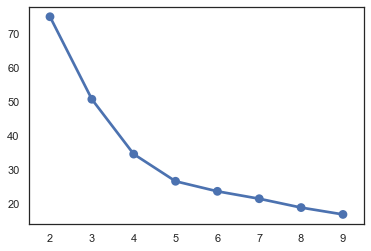

In [108]:
from kmodes.kmodes import KModes  
from kmodes.kprototypes import KPrototypes  
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt  

# Melakukan Iterasi untuk Mendapatkan nilai Cost  
cost = {}  
for k in range(2,10):  
    kproto = KPrototypes(n_clusters = k,random_state=75)  
    kproto.fit_predict(df_model, categorical=[0,1,2])  
    cost[k]= kproto.cost_  
  
# Memvisualisasikan Elbow Plot  
sns.pointplot(x=list(cost.keys()), y=list(cost.values()))  
plt.show()


**Hasil :**

*Dari hasil tersebut, kamu dapat mengetahui titik siku dari plot tersebut adalah pada saat k = 5. Sehingga kamu memutuskan untuk menggunakan 5 sebagai jumlah cluster optimalnya.*

**C. Membuat Model**

*Buatlah model Kprototypes dengan nilai k = 5 dan random state = 75. Kemudian simpan hasilnya dalam bentuk pickle.*

In [109]:
import pickle  
from kmodes.kmodes import KModes  
from kmodes.kprototypes import KPrototypes  
  
kproto = KPrototypes(n_clusters= 5, random_state= 75)  
kproto = kproto.fit(df_model, categorical=[0,1,2])  
  
#Save Model  
#pickle.dump(kproto, open('cluster.pkl', 'wb'))  


**D. Menggunakan Model**

*Model yang sudah kamu buat dapat **digunakan untuk menentukan setiap pelanggan masuk ke dalam cluster yang mana**. Kali ini kamu akan menggunakan model tersebut untuk menentukan segmen pelanggan yang ada di dataset.*

In [110]:
import pickle

# Pada tahap ini menggunakan data dari df & df_model
# Fungsi Memanggil Model
def modelling (data):  
      
    # Memanggil Model  
    kpoto = pickle.load(open('cluster.pkl', 'rb'))  
      
    # Melakukan Prediksi  
    clusters= kpoto.predict(data,categorical=[0,1,2])  
      
    return clusters  

# Menjalankan model
clusters = modelling(df_model)

# Menggabungkan data awal dan segmen pelanggan     
df_final = df.copy()    
df_final['cluster'] = clusters
df_final.head()


,Customer_ID,Nama Pelanggan,Jenis Kelamin,Umur,Profesi,Tipe Residen,NilaiBelanjaSetahun,cluster
0,CUST-001,Budi Anggara,Pria,58,Wiraswasta,Sector,9497927,1
1,CUST-002,Shirley Ratuwati,Wanita,14,Pelajar,Cluster,2722700,0
2,CUST-003,Agus Cahyono,Pria,48,Professional,Cluster,5286429,2
3,CUST-004,Antonius Winarta,Pria,53,Professional,Cluster,5204498,2
4,CUST-005,"Ibu Sri Wahyuni, IR",Wanita,41,Wiraswasta,Cluster,10615206,3


**E. Menampilkan Cluster Tiap Pelanggan**

*Setelah kamu menggabungkan data awal pelanggan dan cluster-nya, kamu perlu untuk menampilkan dan mengobservasi hasilnya untuk membantu kamu dalam memberi nama tiap cluster berdasarkan karakteristiknya.*

In [111]:
# Menampilkan data pelanggan berdasarkan cluster nya  
for i in range(0, 5):  
    print('\nPelanggan cluster: {}\n'.format(i))  
    print(df_final[df_final['cluster']== i])


Pelanggan cluster: 0

   Customer_ID    Nama Pelanggan Jenis Kelamin  Umur    Profesi Tipe Residen  \
1     CUST-002  Shirley Ratuwati        Wanita    14    Pelajar      Cluster   
19    CUST-020    Irene Novianto        Wanita    16    Pelajar       Sector   
30    CUST-031     Eviana Handry        Wanita    19  Mahasiswa      Cluster   
32    CUST-033   Cecilia Kusnadi        Wanita    19  Mahasiswa      Cluster   
39    CUST-040    Irene Darmawan        Wanita    14    Pelajar       Sector   

    NilaiBelanjaSetahun  cluster  
1               2722700        0  
19              2896845        0  
30              3042773        0  
32              3047926        0  
39              2861855        0  

Pelanggan cluster: 1

   Customer_ID    Nama Pelanggan Jenis Kelamin  Umur     Profesi Tipe Residen  \
0     CUST-001      Budi Anggara          Pria    58  Wiraswasta       Sector   
6     CUST-007     Cahyono, Agus          Pria    64  Wiraswasta       Sector   
12    CUST-013      

**F. Visualisasi Hasil Clustering - Box Plot**

*Kamu juga membuat visualisasi hasil clustering untuk dapat memudahkan kamu melakukan penamaan di tiap-tiap cluster.*

*Buatlah *boxlplot* untuk memvisualisasikan setiap variabel tiap pelanggan yang dibagi berdasarkan nama cluster-nya.* 

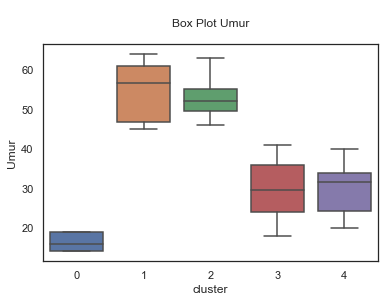

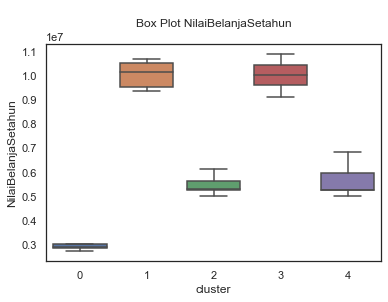

In [112]:
# Data Numerical
kolom_numerik = ['Umur','NilaiBelanjaSetahun']  
  
for i in kolom_numerik:  
    plt.figure(figsize=(6,4))  
    ax = sns.boxplot(x = 'cluster',y = i, data = df_final)  
    plt.title('\nBox Plot {}\n'.format(i), fontsize=12)  
    plt.show() 


**G. Visualisasi Hasil Clustering - Count Plot**

*Buatlah **countplot** untuk memvisualisasikan setiap variabel tiap pelanggan yang dibagi berdasarkan nama cluster-nya.*

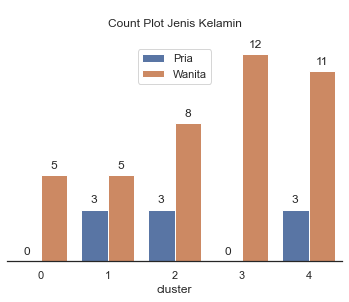

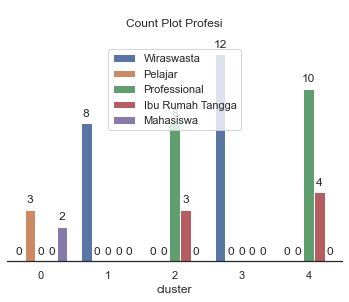

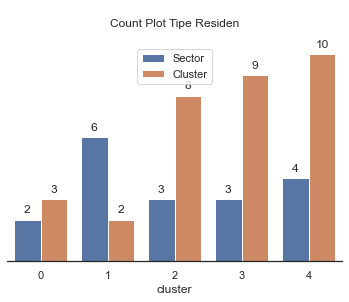

In [113]:
# Data Kategorikal  
kolom_categorical = ['Jenis Kelamin','Profesi','Tipe Residen']  
  
for i in kolom_categorical:  
    plt.figure(figsize=(6,4))  
    ax = sns.countplot(data = df_final, x = 'cluster', hue = i )  
    plt.title('\nCount Plot {}\n'.format(i), fontsize=12)  
    ax.legend(loc="upper center")  
    for p in ax.patches:  
        ax.annotate(format(p.get_height(), '.0f'),  
                    (p.get_x() + p.get_width() / 2., p.get_height()),  
                     ha = 'center',  
                     va = 'center',  
                     xytext = (0, 10),  
                     textcoords = 'offset points')  
      
    sns.despine(right=True,top = True, left = True)  
    ax.axes.yaxis.set_visible(False)  
    plt.show()  


**H. Menamakan Cluster**

*Dari hasil observasi yang dilakukan kamu dapat memberikan nama segmen dari tiap tiap nomor klusternya, yaitu:*

1. ***Cluster 0**: Diamond Young Entrepreneur, isi cluster ini adalah para wiraswasta yang memiliki nilai transaksi rata-rata mendekati 10 juta. Selain itu isi dari cluster ini memiliki umur sekitar 18 - 41 tahun dengan rata-ratanya adalah 29 tahun.*
2. ***Cluster 1**: Diamond Senior Entrepreneur, isi cluster ini adalah para wiraswasta yang memiliki nilai transaksi rata-rata mendekati 10 juta. Isi dari cluster ini memiliki umur sekitar 45 - 64 tahun dengan rata-ratanya adalah 55 tahun.*
3. ***Cluster 2**: Silver Students, isi cluster ini adalah para pelajar dan mahasiswa dengan rata-rata umur mereka adalah 16 tahun dan nilai belanja setahun mendekati 3 juta.*
4. ***Cluster 3**: Gold Young Member, isi cluster ini adalah para profesional dan ibu rumah tangga yang berusia muda dengan rentang umur sekitar 20 - 40 tahun dan dengan rata-rata 30 tahun dan nilai belanja setahunnya mendekati 6 juta.*
5. ***Cluster 4**: Gold Senior Member, isi cluster ini adalah para profesional dan ibu rumah tangga yang berusia tua dengan rentang umur 46 - 63 tahun dan dengan rata-rata 53 tahun dan nilai belanja setahunnya mendekati 6 juta.*

In [115]:
# Mapping nama kolom  
df_final['segmen'] = df_final['cluster'].map({  
    0: 'Diamond Young Member',  
    1: 'Diamond Senior Member',  
    2: 'Silver Member',  
    3: 'Gold Young Member',  
    4: 'Gold Senior Member'  
})  

df_final.info()
df_final.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Customer_ID          50 non-null     object
 1   Nama Pelanggan       50 non-null     object
 2   Jenis Kelamin        50 non-null     object
 3   Umur                 50 non-null     int64 
 4   Profesi              50 non-null     object
 5   Tipe Residen         50 non-null     object
 6   NilaiBelanjaSetahun  50 non-null     int64 
 7   cluster              50 non-null     uint16
 8   segmen               50 non-null     object
dtypes: int64(2), object(6), uint16(1)
memory usage: 3.3+ KB


,Customer_ID,Nama Pelanggan,Jenis Kelamin,Umur,Profesi,Tipe Residen,NilaiBelanjaSetahun,cluster,segmen
0,CUST-001,Budi Anggara,Pria,58,Wiraswasta,Sector,9497927,1,Diamond Senior Member
1,CUST-002,Shirley Ratuwati,Wanita,14,Pelajar,Cluster,2722700,0,Diamond Young Member
2,CUST-003,Agus Cahyono,Pria,48,Professional,Cluster,5286429,2,Silver Member
3,CUST-004,Antonius Winarta,Pria,53,Professional,Cluster,5204498,2,Silver Member
4,CUST-005,"Ibu Sri Wahyuni, IR",Wanita,41,Wiraswasta,Cluster,10615206,3,Gold Young Member


**I. Kesimpulan**

1. *Cluster mana yang merupakan cluster yang paling baik?*
    Jawaban : Cluster 4 
2. *Akhirnya kamu sudah berhasil melakukan segmentasi pelanggan dan mendapatkan nama yang cocok untuk masing masing cluster, yaitu:*

- ***Cluster 0**: Diamond Young Entrepreneur, isi cluster ini adalah para wiraswasta yang memiliki nilai transaksi rata-rata mendekati 10 juta. Selain itu isi dari cluster ini memiliki umur sekitar 18 - 41 tahun dengan rata-ratanya adalah 29 tahun.*
- ***Cluster 1**: Diamond Senior Entrepreneur, isi cluster ini adalah para wiraswasta yang memiliki nilai transaksi rata-rata mendekati 10 juta. Isi dari cluster ini memiliki umur sekitar 45 - 64 tahun dengan rata-ratanya adalah 55 tahun.*
- ***Cluster 2**: Silver Students, isi cluster ini adalah para pelajar dan mahasiswa dengan rata-rata umur mereka adalah 16 tahun dan nilai belanja setahun mendekati 3 juta.*
- ***Cluster 3**: Gold Young Member, isi cluster ini adalah para profesional dan ibu rumah tangga yang berusia muda dengan rentang umur sekitar 20 - 40 tahun dan dengan rata-rata 30 tahun dan nilai belanja setahunnya mendekati 6 juta.*
- ***Cluster 4**: Gold Senior Member, isi cluster ini adalah para profesional dan ibu rumah tangga yang berusia tua dengan rentang umur 46 - 63 tahun dan dengan rata-rata 53 tahun dan nilai belanja setahunnya mendekati 6 juta.*

**Tips :**

*Pada aplikasi di industri proses penentuan cluster yang optimum bisa dilakukan juga dengan melihat matriks evaluasi lainnya seperti **sillhoute score dan callinski-harabaz score.** Untuk detailnya bisa dilihat di dokumentasi sklearn (https://scikit-learn.org/stable/modules/clustering.html#clustering-performance-evaluation).*

*Selain itu penentuan jumlah cluster yang optimal juga perlu mepertimbangkan masukan dari tim yang akan menggunakan modelnya. Sehingga bisa menghasilkan cluster yang sesuai dengan kebutuhan mereka dan juga bagaimana cara mereka akan memperlakukan segmen-segmen ini.*

*Tantangan lainnya adalah jumlah data yang jauh lebih banyak dibanding dengan dataset yang kamu gunakan untuk latihan ini. Sehingga waktu pemrosesan datanya dan pembuatan modelnya akan menjadi lebih lama.*

**Project Lanjut ke Tahap Industri - Di Customer_Segmentation_produksi**